In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LungCapData.csv')

# Drop index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Encode target and categorical features
le = LabelEncoder()
df["Smoke"] = le.fit_transform(df["Smoke"])         # yes → 1, no → 0
df["Gender"] = le.fit_transform(df["Gender"])       # male/female → 1/0
df["Caesarean"] = le.fit_transform(df["Caesarean"]) # yes → 1, no → 0

df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("Smoke", axis=1)  # Features
y = df["Smoke"]               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Basic decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict & evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8413793103448276
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       133
           1       0.08      0.08      0.08        12

    accuracy                           0.84       145
   macro avg       0.50      0.50      0.50       145
weighted avg       0.85      0.84      0.84       145



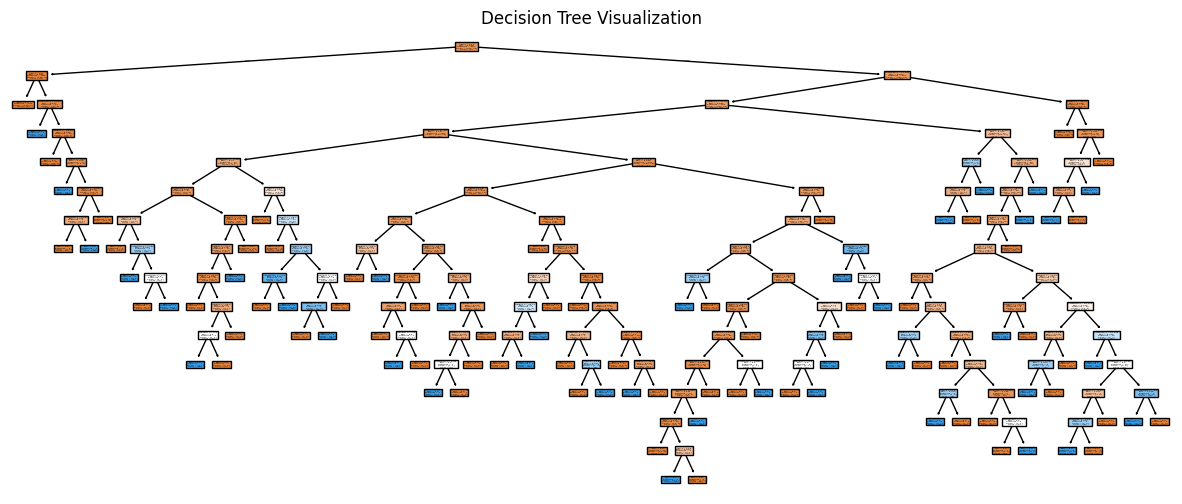

In [10]:
plt.figure(figsize=(15, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [11]:
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)
y_pred_limited = dt_limited.predict(X_test)

print("Limited Depth Tree Accuracy:", accuracy_score(y_test, y_pred_limited))


Limited Depth Tree Accuracy: 0.9172413793103448


In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       133
           1       0.00      0.00      0.00        12

    accuracy                           0.89       145
   macro avg       0.46      0.48      0.47       145
weighted avg       0.84      0.89      0.86       145



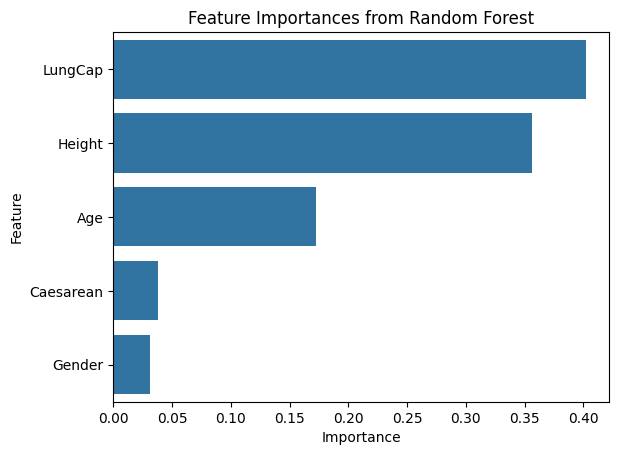

In [13]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importances from Random Forest")
plt.show()


In [14]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.89655172 0.90344828 0.86896552 0.87586207 0.88965517]
Average CV Accuracy: 0.886896551724138
